In [1]:
!pip install gcsfs


[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [1]:
import pandas as pd
gcs_file_path = "gs://ba820-yelp/dataset-yelp/yelp_academic_dataset_business.json"
df_business = pd.read_json(gcs_file_path, lines=True)
print(df_business.head())
print(f"df_business shape: {df_business.shape}")

              business_id                      name  \
0  Pns2l4eNsfO8kk83dixA6A  Abby Rappoport, LAC, CMQ   
1  mpf3x-BjTdTEA3yCZrAYPw             The UPS Store   
2  tUFrWirKiKi_TAnsVWINQQ                    Target   
3  MTSW4McQd7CbVtyjqoe9mw        St Honore Pastries   
4  mWMc6_wTdE0EUBKIGXDVfA  Perkiomen Valley Brewery   

                           address           city state postal_code  \
0           1616 Chapala St, Ste 2  Santa Barbara    CA       93101   
1  87 Grasso Plaza Shopping Center         Affton    MO       63123   
2             5255 E Broadway Blvd         Tucson    AZ       85711   
3                      935 Race St   Philadelphia    PA       19107   
4                    101 Walnut St     Green Lane    PA       18054   

    latitude   longitude  stars  review_count  is_open  \
0  34.426679 -119.711197    5.0             7        0   
1  38.551126  -90.335695    3.0            15        1   
2  32.223236 -110.880452    3.5            22        0   
3  39.9555

In [ ]:
import pandas as pd

gcs_file_path = "gs://ba820-yelp/dataset-yelp/yelp_academic_dataset_review.json"
chunk_size = 100000  
chunks = pd.read_json(gcs_file_path, lines=True, chunksize=chunk_size)
df_review = pd.concat(chunks, ignore_index=True)  
print(f"df_review shape: {df_review.shape}")
print(df_review.head(10))

In [2]:
import pandas as pd

gcs_user_file_path = "gs://ba820-yelp/dataset-yelp/yelp_academic_dataset_user.json"
chunk_size = 100000 
user_chunks = pd.read_json(gcs_user_file_path, lines=True, chunksize=chunk_size)
df_user = pd.concat(user_chunks, ignore_index=True)  

print(f"Shape of df_user: {df_user.shape}")
print(df_user.head(10))

df_user 形状: (1987897, 22)
                  user_id      name  review_count        yelping_since  \
0  qVc8ODYU5SZjKXVBgXdI7w    Walker           585  2007-01-25 16:47:26   
1  j14WgRoU_-2ZE1aw1dXrJg    Daniel          4333  2009-01-25 04:35:42   
2  2WnXYQFK0hXEoTxPtV2zvg     Steph           665  2008-07-25 10:41:00   
3  SZDeASXq7o05mMNLshsdIA      Gwen           224  2005-11-29 04:38:33   
4  hA5lMy-EnncsH4JoR-hFGQ     Karen            79  2007-01-05 19:40:59   
5  q_QQ5kBBwlCcbL1s4NVK3g      Jane          1221  2005-03-14 20:26:35   
6  cxuxXkcihfCbqt5Byrup8Q       Rob            12  2009-02-24 03:09:06   
7  E9kcWJdJUHuTKfQurPljwA      Mike           358  2008-12-11 22:11:56   
8  lO1iq-f75hnPNZkTy3Zerg  Rachelle            40  2008-12-29 22:40:56   
9  AUi8MPWJ0mLkMfwbui27lg      John           109  2010-01-07 18:32:04   

   useful  funny   cool                                              elite  \
0    7217   1259   5994                                               2007   
1  

In [ ]:
print("Business data missing value：")
print(df_business.isnull().sum())
print("\nReview missing value：")
print(df_review.isnull().sum())
print("\nUser missing value：")
print(df_user.isnull().sum())

In [ ]:
df_business['categories'] = df_business['categories'].fillna("Unknown")
df_business['hours'] = df_business['hours'].fillna("Not Available")

print(df_business[['categories', 'hours']].isnull().sum())

In [ ]:
# Check duplicate value
df_business.drop_duplicates(subset=['business_id'], inplace=True)
df_review.drop_duplicates(subset=['review_id'], inplace=True)
df_user.drop_duplicates(subset=['user_id'], inplace=True)


In [ ]:
df_review['date'] = pd.to_datetime(df_review['date'], errors='coerce')
print("\nExample after converting the Review date field:")
print(df_review[['review_id', 'date']].head())

In [ ]:
df_business_review = pd.merge(df_review, df_business, on='business_id', how='outer', suffixes=('_review', '_business'))
print(f"df_business_review shape: {df_business_review.shape}")

In [ ]:
df_business_review = pd.merge(df_review, df_business, on='business_id', how='inner', suffixes=('_review', '_business'))
df_full = pd.merge(df_business_review, df_user, on='user_id', how='inner', suffixes=('', '_user'))

print(df_full.head(10))

In [ ]:
print(f"df_full shape: {df_full.shape}")

/var/tmp/ipykernel_67838/387751357.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


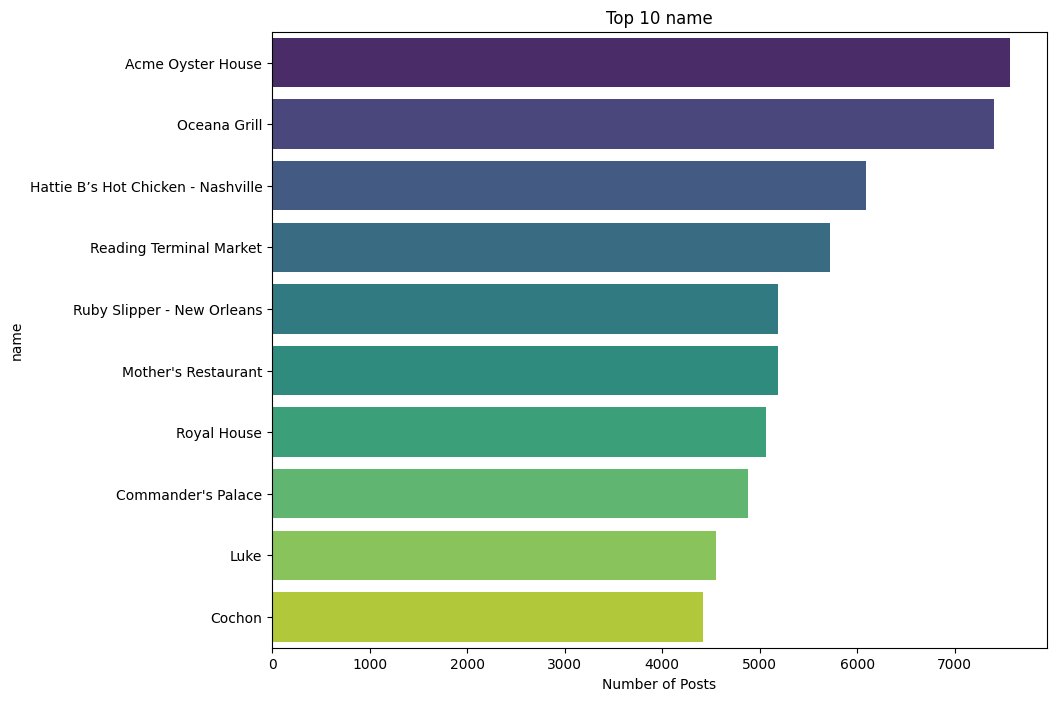

In [5]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
top_name = df_business.nlargest(10, 'review_count')

plt.figure(figsize=(10, 8))
sns.barplot(
    y=top_name['name'],
    x=top_name['review_count'],
    palette='viridis'
)
plt.title('Top 10 name')
plt.xlabel('Number of Posts')
plt.ylabel('name')
plt.show()

Royal House, Commander's Palace,Luke are the top 3 business with most reviews.

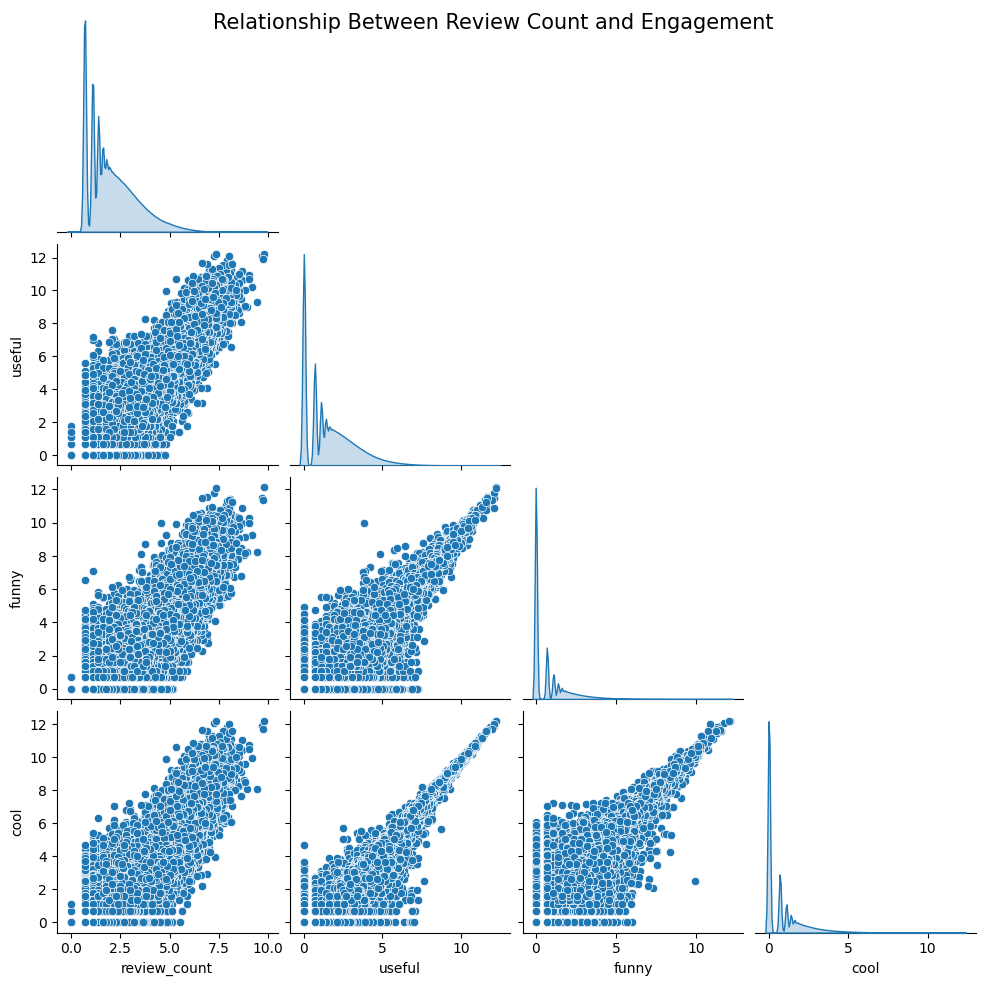

In [6]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

selected_columns = ["review_count", "useful", "funny", "cool"]

df_log = df_user[selected_columns].apply(np.log1p)

sns.pairplot(df_log, diag_kind="kde", corner=True)
plt.suptitle("Relationship Between Review Count and Engagement", fontsize=15, y=0.98)
plt.show()

The relationship plot shows a positive correlation between review_count and useful, funny, cool. Such positive relationship indicates that, more reviews means more users would participate the review.

In [7]:
!pip install folium
import folium
from folium.plugins import HeatMap
import pandas as pd

df_map = df_business[['latitude', 'longitude']].dropna()

heat_map = folium.Map(location=[df_map['latitude'].mean(), df_map['longitude'].mean()], zoom_start=4.5)

data = df_map[['latitude', 'longitude']].values.tolist()

HeatMap(data, radius=15, blur=10).add_to(heat_map)

heat_map.save("geographic_heatmap.html")

heat_map

  Using cached folium-0.19.4-py2.py3-none-any.whl.metadata (3.8 kB)
  Using cached branca-0.8.1-py3-none-any.whl.metadata (1.5 kB)
  Using cached xyzservices-2025.1.0-py3-none-any.whl.metadata (4.3 kB)
Using cached folium-0.19.4-py2.py3-none-any.whl (110 kB)
Using cached branca-0.8.1-py3-none-any.whl (26 kB)
Using cached xyzservices-2025.1.0-py3-none-any.whl (88 kB)

[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


From the heatmap, we can observe that yelp business units focus on big cities like NY,LA,FL,CHI,PHX, and low-density states like ND,MN has much less business units. Therefore, a commerce pattern can be concluded that yelp business perfer being in big cities for attracting larger amount of customers. Also, it may indicate that yelp is popular among big cities or states.

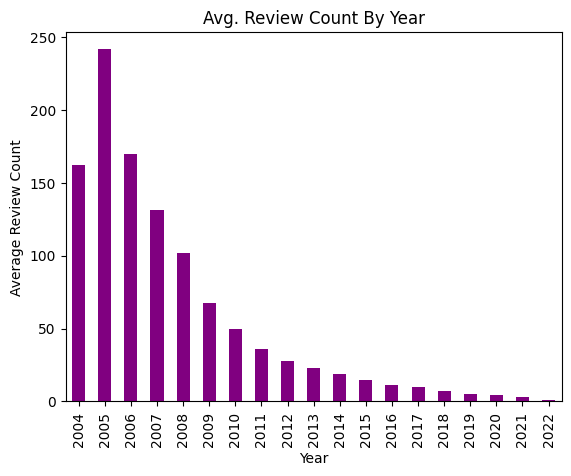

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

df_user['yelping_since'] = pd.to_datetime(df_user['yelping_since'])

df_user['yelping_year'] = df_user['yelping_since'].dt.year

df_user.groupby('yelping_year')['review_count'].mean().plot(kind='bar', color='purple')
plt.title('Avg. Review Count By Year')
plt.xlabel('Year')
plt.ylabel('Average Review Count')
plt.show()

Older Yelp users are the most active reviewers. Users From 2010 contribute fewer reviews. This trend suggeststhe changes in how people engage with online reviews these years.

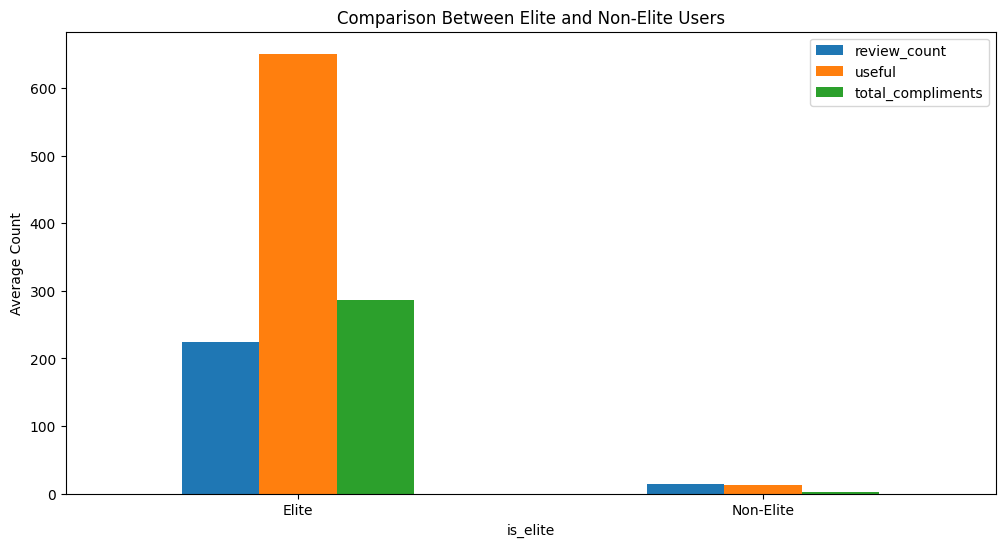

In [9]:
compliment_columns = [
    'compliment_hot', 'compliment_more', 'compliment_profile',
    'compliment_cute', 'compliment_list', 'compliment_note',
    'compliment_plain', 'compliment_cool', 'compliment_funny',
    'compliment_writer', 'compliment_photos'
]

df_user['total_compliments'] = df_user[compliment_columns].sum(axis=1)
df_user['is_elite'] = df_user['elite'].apply(lambda x: 'Elite' if x != '' else 'Non-Elite')

df_user.groupby('is_elite')[['review_count', 'useful', 'total_compliments']].mean().plot(kind='bar', figsize=(12, 6))
plt.title('Comparison Between Elite and Non-Elite Users')
plt.ylabel('Average Count')
plt.xticks(rotation=0)
plt.show()

Elite users are significantly more active than non-elite users, and non-elite users have much less engagement.

In [ ]:
PCA

In [10]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

numerical_cols = df_business.select_dtypes(include=[np.number]).columns
df_numerical = df_business[numerical_cols]

sc = StandardScaler()
normalized_data = sc.fit_transform(df_numerical)

model = PCA()
model.fit(normalized_data)
cumulative_variance = np.cumsum(model.explained_variance_ratio_)

n_components = np.argmax(cumulative_variance >= 0.75) + 1
print("Number of principal components needed to explain 75% of the variance:", n_components)

Number of principal components needed to explain 75% of the variance: 4


In [11]:
model = PCA(n_components=n_components)
transformed_data = model.fit_transform(normalized_data)
transformed_data = pd.DataFrame(transformed_data, columns=[f'PC{i+1}' for i in range(n_components)])
transformed_data.head()

PC1       PC2       PC3       PC4
0  1.198231  0.642402 -2.056504 -1.695413
1  0.322682 -0.285393  0.665730  0.408550
2  0.608953 -0.480794 -1.783775 -0.662758
3 -0.348098  0.268173  0.349134  0.167059
4 -0.185770  0.322226  0.505319 -0.539059

In [12]:
components_df = pd.DataFrame(model.components_)
components_df.columns = df_business[numerical_cols].columns
components_df.index = [f"PC{i+1}" for i in range(components_df.shape[0])]
components_df

latitude  longitude     stars  review_count   is_open
PC1  0.719921  -0.642865 -0.059079     -0.238825 -0.088948
PC2 -0.046501  -0.360953  0.642972      0.507060  0.443878
PC3  0.034147   0.102742 -0.182295     -0.451357  0.866789
PC4  0.214470   0.016653 -0.661376      0.687618  0.208541

In [13]:
print("Cumulative explained variance:", model.explained_variance_ratio_.sum())

Cumulative explained variance: 0.8327134484568847


In [ ]:
K-mean

In [14]:
pip install yellowbrick


[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

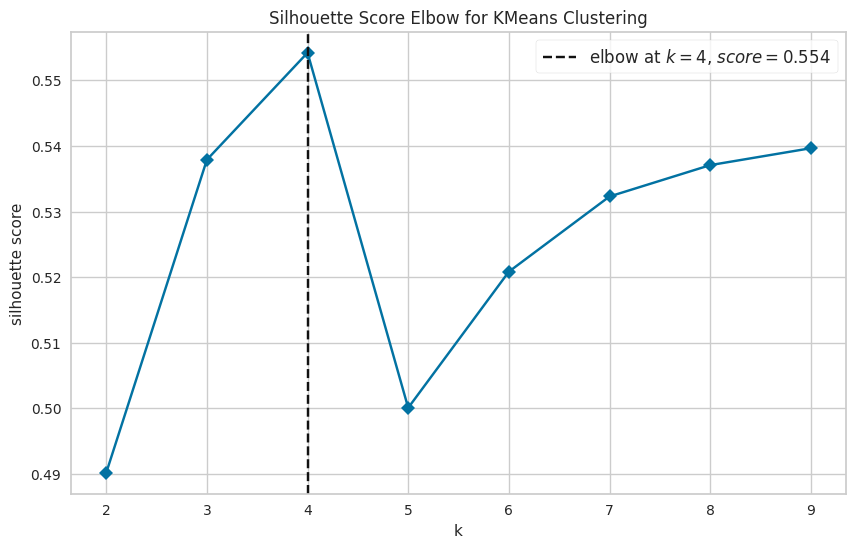

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer
import numpy as np

df_sampled = df_business.sample(frac=0.1, random_state=42) 

feature = ['stars', 'review_count']
scaler = StandardScaler()
df_business_scaled = scaler.fit_transform(df_sampled[feature])

kmeans = KMeans(n_init=5, random_state=42)  
plt.figure(figsize=(10, 6))
visualizer = KElbowVisualizer(kmeans, k=(2,10), metric="silhouette", timings=False)

visualizer.fit(df_business_scaled)
visualizer.show()

In [ ]:
We drop the latitude and longitude, which improves the aggregation effect

In [16]:
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, n_init=10, random_state=42)
df_sampled['cluster'] = kmeans.fit_predict(df_business_scaled)  
cluster_summary = df_sampled.groupby('cluster')[feature].mean() 
cluster_summary

stars  review_count
cluster                        
0        2.409851     23.781008
1        4.169549     29.661944
2        3.923510    353.523349
3        4.102941   1572.441176

In [17]:
from sklearn.metrics import silhouette_score
silhouette_kmean_score = silhouette_score(df_business_scaled, kmeans.labels_)
print(f"Silhouette Score for K-Means: {silhouette_kmean_score}")

Silhouette Score for K-Means: 0.5539365323254873


In [ ]:
Silhouette Score = 0.5539365323254873 More than 0.5 proves that aggregation works well

In [ ]:
Hierarchy

In [18]:
df_business = df_sampled.drop(columns=['cluster'])

In [19]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

sc = StandardScaler()
numerical_features = df_business.select_dtypes(include=['number']).columns
df_business_scaled = sc.fit_transform(df_business[numerical_features])  

df_business_scores = pd.DataFrame(columns=['num_clusters', 'silhouette_score'])

z = linkage(df_business_scaled, method='ward')
for num_clusters in range(2, 10):
    labels = fcluster(z, num_clusters, criterion='maxclust')
    score = silhouette_score(df_business_scaled, labels)
    df_business_scores = pd.concat([df_business_scores, pd.DataFrame([[num_clusters, score]], columns=['num_clusters', 'silhouette_score'])], ignore_index=True)
    print("# cluster = ", num_clusters)

/var/tmp/ipykernel_67838/1054957953.py:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_business_scores = pd.concat([df_business_scores, pd.DataFrame([[num_clusters, score]], columns=['num_clusters', 'silhouette_score'])], ignore_index=True)


# cluster =  2
# cluster =  3
# cluster =  4
# cluster =  5
# cluster =  6
# cluster =  7
# cluster =  8
# cluster =  9


In [ ]:
Missing fonts in the front keeps giving an error， therefore i add this here

In [20]:
import matplotlib.font_manager as font_manager

fonts = font_manager.findSystemFonts()
available_fonts = {font_manager.FontProperties(fname=font).get_name(): font for font in fonts}
for font in sorted(available_fonts):
    print(font)

DejaVu Sans
DejaVu Sans Mono
DejaVu Serif
Latin Modern Math
Latin Modern Mono
Latin Modern Mono Caps
Latin Modern Mono Light
Latin Modern Mono Light Cond
Latin Modern Mono Prop
Latin Modern Mono Prop Light
Latin Modern Mono Slanted
Latin Modern Roman
Latin Modern Roman Caps
Latin Modern Roman Demi
Latin Modern Roman Dunhill
Latin Modern Roman Slanted
Latin Modern Roman Unslanted
Latin Modern Sans
Latin Modern Sans Demi Cond
Latin Modern Sans Quotation
Lato


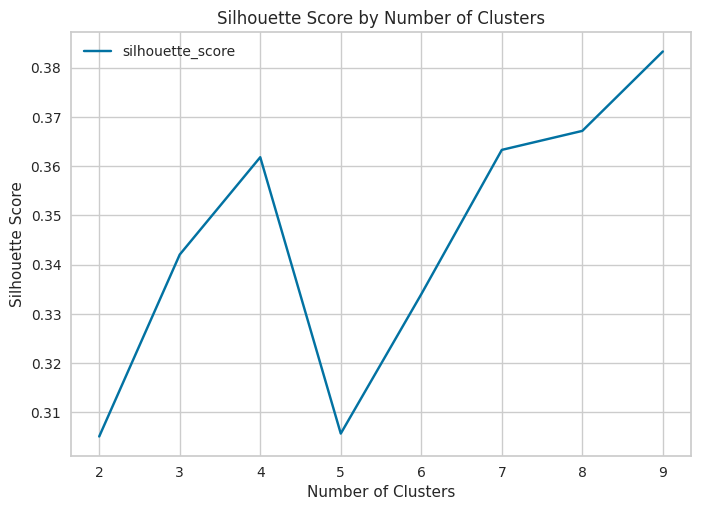

In [21]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font', family='DejaVu Sans')  

df_business_scores.plot.line(x='num_clusters', y='silhouette_score')
plt.xlabel('Number of Clusters')  
plt.ylabel('Silhouette Score')   
plt.title('Silhouette Score by Number of Clusters')  
plt.show()

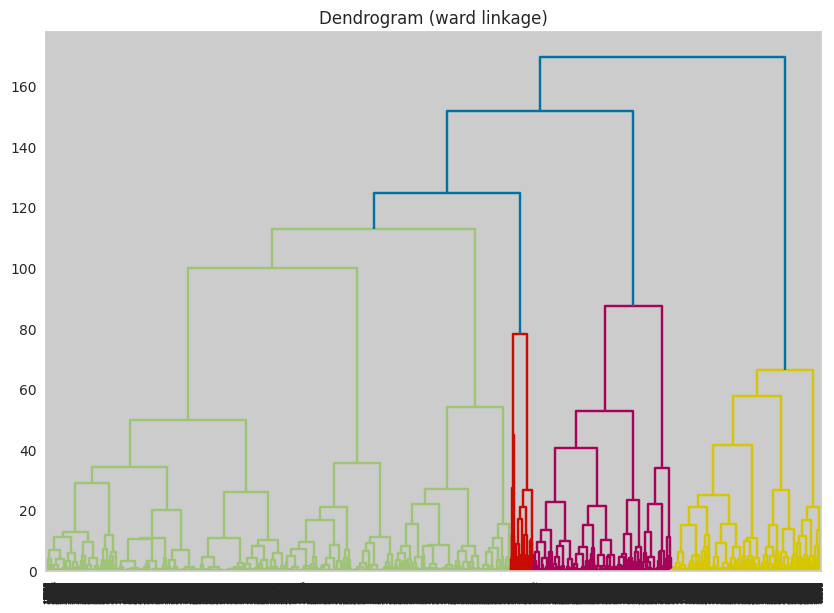

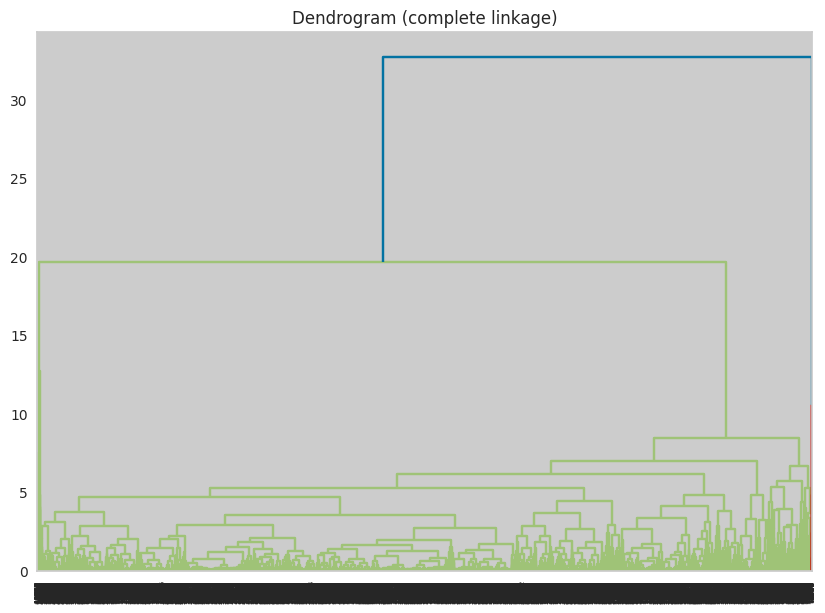

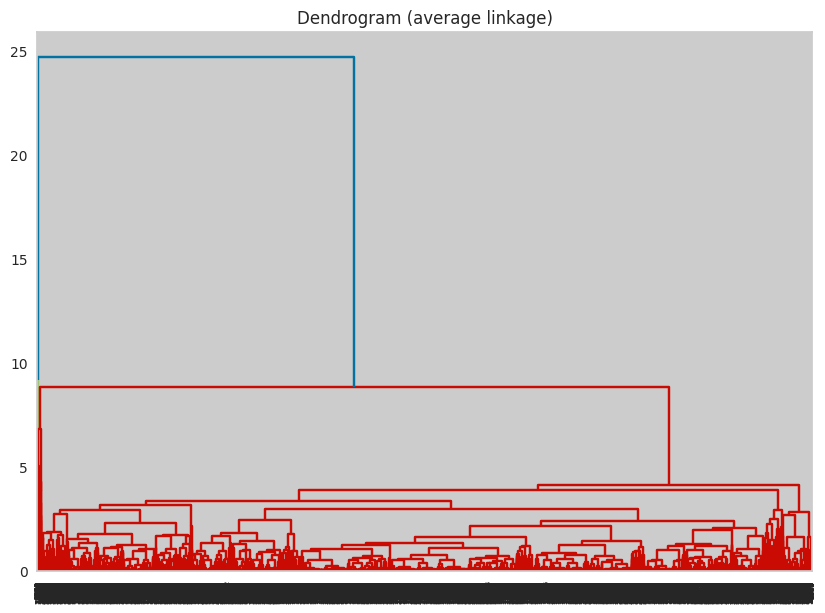

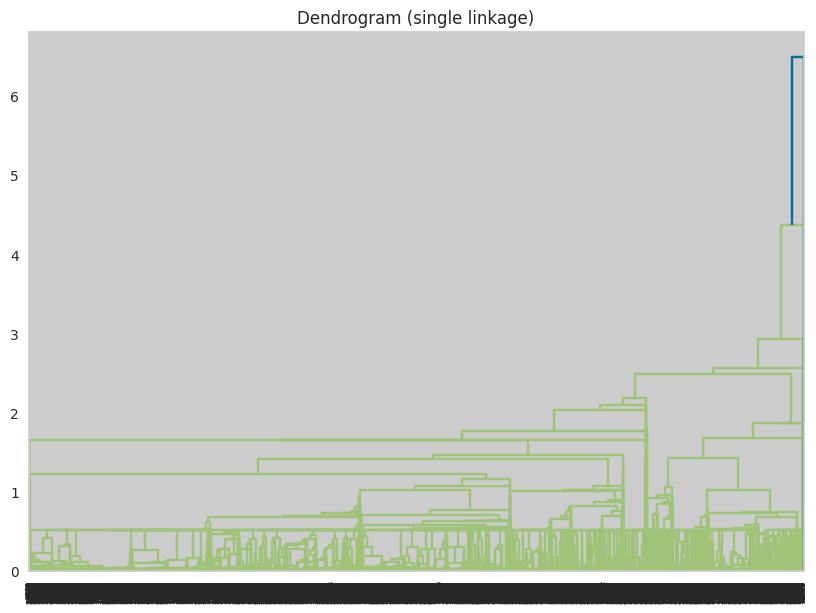

In [22]:
methods = ['ward', 'complete', 'average','single']
for method in methods:
    linked = linkage(df_business_scaled, method=method)
    plt.figure(figsize=(10, 7))
    dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
    plt.title(f'Dendrogram ({method} linkage)')
    plt.show()

In [23]:
n_clusters = 9
linkage_matrix = linkage(df_business_scaled, method='ward')
df_business['hierarchical_cluster'] = fcluster(linkage_matrix, n_clusters, criterion='maxclust')
hierarchical_cluster_summary_numeric = df_business.groupby('hierarchical_cluster')[feature].mean()
hierarchical_cluster_summary_numeric

stars  review_count
hierarchical_cluster                        
1                     3.542857     32.140816
2                     3.523505     34.497320
3                     3.440141     20.385563
4                     3.748699     32.123994
5                     3.870112    397.689944
6                     4.043860   1273.087719
7                     2.167403     21.861749
8                     4.067303     32.157895
9                     4.055929     34.486018

In [24]:
hiera_silhouette_avg= silhouette_score(df_business_scaled, df_business['hierarchical_cluster'])
print("Silhouette Score of hierarchical(n_cluster = 9):", hiera_silhouette_avg)
print("Silhouette Score of K Means:", silhouette_kmean_score)

Silhouette Score of hierarchical(n_cluster = 9): 0.3833148848824028
Silhouette Score of K Means: 0.5539365323254873


In [ ]:
Compared to hierarchical, k-mean is better, so at this stage, we choose k-mean

In [25]:
!pip install psynlig


[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [39]:
df_business = df_sampled.drop(columns=['cluster'])

In [40]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

numerical_cols = df_business.select_dtypes(include=[np.number]).columns
df_numerical = df_business[numerical_cols]

sc = StandardScaler()
normalized_data = sc.fit_transform(df_numerical)

model = PCA()
model.fit(normalized_data)
cumulative_variance = np.cumsum(model.explained_variance_ratio_)

n_components = np.argmax(cumulative_variance >= 0.75) + 1
print("Number of principal components needed to explain 75% of the variance:", n_components)

Number of principal components needed to explain 75% of the variance: 4


In [41]:
model = PCA(n_components=n_components)
transformed_data = model.fit_transform(normalized_data)
transformed_data = pd.DataFrame(transformed_data, columns=[f'PC{i+1}' for i in range(n_components)])
transformed_data.head()

PC1       PC2       PC3       PC4
0  0.646979  1.577791  0.038848 -0.747430
1  0.444164 -0.331210 -1.983025 -0.034854
2  1.852178  0.901538  0.552979  0.652031
3 -1.379930 -0.150087  0.368967 -0.721931
4  0.241367  0.035287  0.585362  0.008124

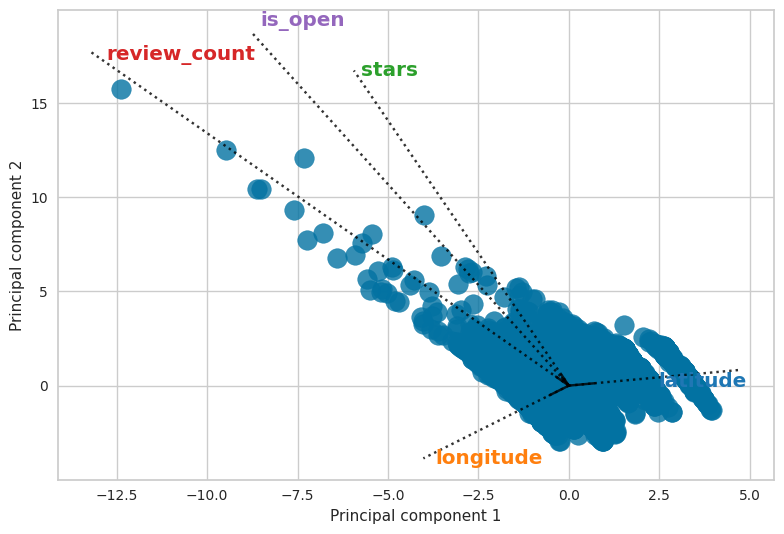

In [46]:
from psynlig import pca_2d_scores

loading_settings = {
    'adjust_text': True,
    'add_text': True,
}

if isinstance(transformed_data, pd.DataFrame):
    transformed_data = transformed_data.to_numpy()

pca_2d_scores(
    model,
    transformed_data,
    xvars=df_numerical.columns,
    select_components={(1, 2)},
    loading_settings=loading_settings,
    s=200,
    alpha=.8,
    cmap_class='Dark2',
)
plt.show()

In [ ]:
The visualization indicates a clear trend of association between geographic coordinates (longitude and latitude) and other factors like review count and star ratings, which significantly contribute to Principal Component 1.